### imports and setup

In [48]:
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [50]:
from exploration import *
from utils import *

### load data

In [51]:
monthly_data, yearly_data = load_dataset()

### explore data

#### examine monthly data

In [52]:
monthly_data

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,average_price_d1,year,month,seconds
301,1995-01-01,barking and dagenham,50460,E09000002,96.0,NaN,1,0.0,1995,1,0.0
302,1995-02-01,barking and dagenham,51086,E09000002,95.0,NaN,1,626.0,1995,2,2678400.0
303,1995-03-01,barking and dagenham,51269,E09000002,144.0,NaN,1,183.0,1995,3,5097600.0
304,1995-04-01,barking and dagenham,53134,E09000002,109.0,NaN,1,1865.0,1995,4,7776000.0
305,1995-05-01,barking and dagenham,53042,E09000002,149.0,NaN,1,-92.0,1995,5,10368000.0
...,...,...,...,...,...,...,...,...,...,...,...
11438,2019-09-01,yorkshire and the humber,165362,E12000003,6567.0,NaN,0,-342.0,2019,9,778377600.0
11439,2019-10-01,yorkshire and the humber,166669,E12000003,7163.0,NaN,0,1307.0,2019,10,780969600.0
11440,2019-11-01,yorkshire and the humber,164530,E12000003,7117.0,NaN,0,-2139.0,2019,11,783648000.0
11441,2019-12-01,yorkshire and the humber,166932,E12000003,NaN,NaN,0,2402.0,2019,12,786240000.0


In [53]:
monthly_data[monthly_data.borough_flag == 0].area.unique()

array(['east midlands', 'east of england', 'england', 'inner london',
       'london', 'north east', 'north west', 'outer london', 'south east',
       'south west', 'west midlands', 'yorkshire and the humber'],
      dtype=object)

In [54]:
monthly_data[monthly_data.borough_flag == 1].area.unique()

array(['barking and dagenham', 'barnet', 'bexley', 'brent', 'bromley',
       'camden', 'city of london', 'croydon', 'ealing', 'enfield',
       'greenwich', 'hackney', 'hammersmith and fulham', 'haringey',
       'harrow', 'havering', 'hillingdon', 'hounslow', 'islington',
       'kensington and chelsea', 'kingston upon thames', 'lambeth',
       'lewisham', 'merton', 'newham', 'redbridge',
       'richmond upon thames', 'southwark', 'sutton', 'tower hamlets',
       'waltham forest', 'wandsworth', 'westminster'], dtype=object)

In [55]:
monthly_data.date.unique()

array(['1995-01-01T00:00:00.000000000', '1995-02-01T00:00:00.000000000',
       '1995-03-01T00:00:00.000000000', '1995-04-01T00:00:00.000000000',
       '1995-05-01T00:00:00.000000000', '1995-06-01T00:00:00.000000000',
       '1995-07-01T00:00:00.000000000', '1995-08-01T00:00:00.000000000',
       '1995-09-01T00:00:00.000000000', '1995-10-01T00:00:00.000000000',
       '1995-11-01T00:00:00.000000000', '1995-12-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '1996-02-01T00:00:00.000000000',
       '1996-03-01T00:00:00.000000000', '1996-04-01T00:00:00.000000000',
       '1996-05-01T00:00:00.000000000', '1996-06-01T00:00:00.000000000',
       '1996-07-01T00:00:00.000000000', '1996-08-01T00:00:00.000000000',
       '1996-09-01T00:00:00.000000000', '1996-10-01T00:00:00.000000000',
       '1996-11-01T00:00:00.000000000', '1996-12-01T00:00:00.000000000',
       '1997-01-01T00:00:00.000000000', '1997-02-01T00:00:00.000000000',
       '1997-03-01T00:00:00.000000000', '1997-04-01

In [56]:
monthly_data.date.unique().shape

(301,)

In [57]:
301 // 12


25

In [58]:
301 % 12

1

plot timeseries for overall price trends

In [59]:
monthly_data.date.unique()[0]

numpy.datetime64('1995-01-01T00:00:00.000000000')

In [60]:
[
    monthly_data[monthly_data.date == monthly_data.date.unique()
                 [i]].average_price.sum()
    for i in range(len(monthly_data.date.unique()))
]


[3382098,
 3366205,
 3361630,
 3368298,
 3400421,
 3437147,
 3470732,
 3469857,
 3447667,
 3426080,
 3415332,
 3429860,
 3420591,
 3577418,
 3446426,
 3498854,
 3512972,
 3550363,
 3571060,
 3609949,
 3624792,
 3620842,
 3646187,
 3670945,
 3730982,
 3773280,
 3817642,
 3866532,
 3942935,
 4010654,
 4090074,
 4134502,
 4199907,
 4227797,
 4283050,
 4316554,
 4364362,
 4398492,
 4441249,
 4674069,
 4547458,
 4591716,
 4641572,
 4687290,
 4705909,
 4703935,
 4691722,
 4699140,
 4724415,
 4761864,
 4816434,
 4889924,
 4965671,
 5049843,
 5138162,
 5254401,
 5398103,
 5473801,
 5579763,
 5645952,
 5744188,
 5831508,
 5926284,
 6099704,
 6201547,
 6340131,
 6439786,
 6535934,
 6580786,
 6564940,
 6655749,
 6668342,
 6702190,
 6630922,
 6683728,
 6767752,
 6887755,
 7013861,
 7131861,
 7253358,
 7303321,
 7372044,
 7469350,
 7527330,
 7549013,
 7532927,
 7588785,
 7730867,
 7913706,
 8137726,
 8336237,
 8507855,
 8637641,
 8719880,
 8841148,
 8887210,
 8987298,
 8999408,
 9048596,
 9080206,


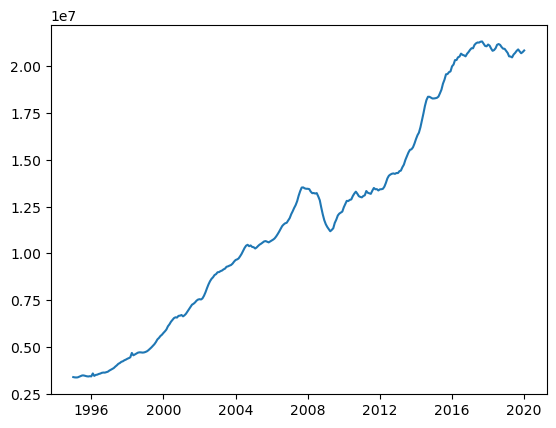

In [61]:
plt.plot(monthly_data.date.unique(), [
    monthly_data[monthly_data.date == monthly_data.date.unique()
                 [i]].average_price.sum()
    for i in range(len(monthly_data.date.unique()))
])


/Users/h.lu/Documents/_academic/_MATH462/math462_project/scripts/exploration.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


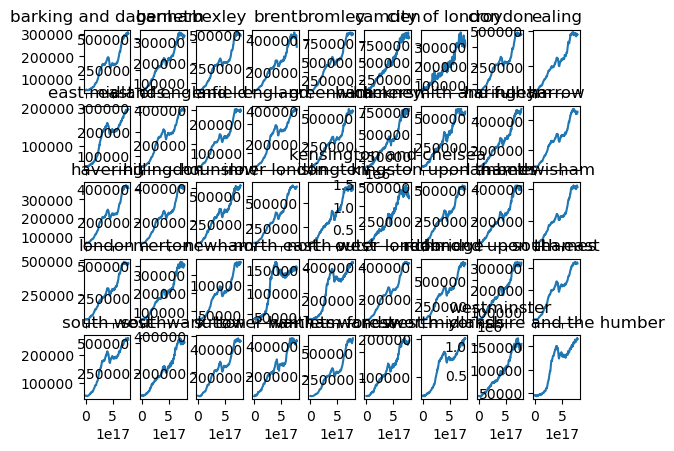

In [62]:
plot_var(monthly_data, "average_price")

visualize aggregate number of crimes committed by month

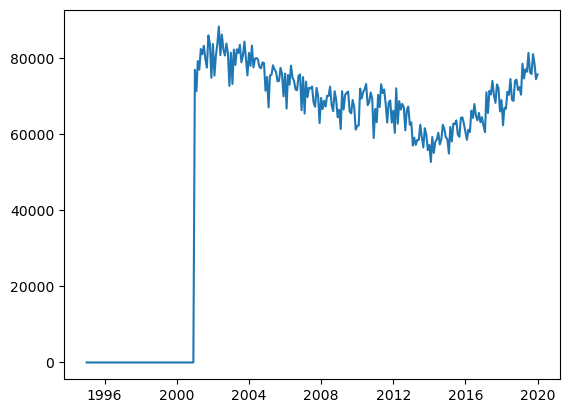

In [63]:
plt.plot(monthly_data.date.unique(), [
    monthly_data[monthly_data.date == monthly_data.date.unique()
                 [i]].no_of_crimes.sum()
    for i in range(len(monthly_data.date.unique()))
])


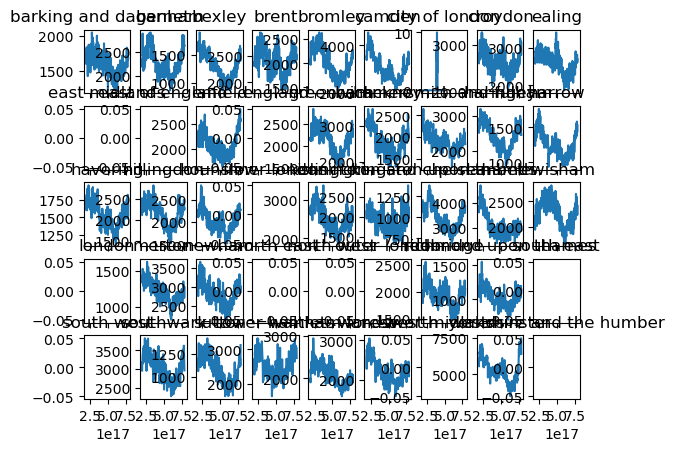

KeyboardInterrupt: 

In [64]:
plot_var(monthly_data, "no_of_crimes")

#### examine yearly data

In [65]:
yearly_data

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag,year,month,seconds
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1,1999,12,155088000.0
52,E09000002,barking and dagenham,2000-12-01,22618.0,NaN,24696,4,163893.0,57000.0,NaN,NaN,1,2000,12,186710400.0
103,E09000002,barking and dagenham,2001-12-01,22323.0,NaN,26050,3,165654.0,54000.0,3780.0,68298.0,1,2001,12,218246400.0
154,E09000002,barking and dagenham,2002-12-01,24813.0,NaN,26653,3,166357.0,52000.0,3780.0,68526.0,1,2002,12,249782400.0
205,E09000002,barking and dagenham,2003-12-01,25358.0,NaN,27792,5,166210.0,55000.0,3780.0,68837.0,1,2003,12,281318400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,E12000003,yorkshire and the humber,2015-12-01,25194.0,7.65,29371,44,5390576.0,2694000.0,NaN,NaN,0,2015,12,660009600.0
902,E12000003,yorkshire and the humber,2016-12-01,25946.0,7.69,29811,43,5425741.0,2735000.0,NaN,NaN,0,2016,12,691632000.0
953,E12000003,yorkshire and the humber,2017-12-01,26309.0,7.66,30484,42,NaN,2759000.0,NaN,NaN,0,2017,12,723168000.0
1004,E12000003,yorkshire and the humber,2018-12-01,26892.0,7.70,31719,43,NaN,2773000.0,NaN,NaN,0,2018,12,754704000.0


In [82]:
yearly_data.loc[(yearly_data.year == 2000) & (
    yearly_data.area == 'barking and dagenham')]["median_salary"].values


array([22618.])

In [ ]:
monthly_data.loc[(monthly_data.year == 1995) &
                 (monthly_data.area == 'barking and dagenham'),
                 'new_col_delete'] = 10
monthly_data.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag,average_price_d1,year,month,new_col_delete
301,1995-01-01,barking and dagenham,50460,E09000002,96.0,NaN,1,0.0,1995,1,10.0
302,1995-02-01,barking and dagenham,51086,E09000002,95.0,NaN,1,626.0,1995,2,10.0
303,1995-03-01,barking and dagenham,51269,E09000002,144.0,NaN,1,183.0,1995,3,10.0
304,1995-04-01,barking and dagenham,53134,E09000002,109.0,NaN,1,1865.0,1995,4,10.0
305,1995-05-01,barking and dagenham,53042,E09000002,149.0,NaN,1,-92.0,1995,5,10.0


### integrate yearly data into monthly dataset

In [ ]:
def interpolate_yearly(monthly_data, yearly_data, col, interpolate=True):
    # by month and area
    # yearly data covers range 1999 to 2019 (all on dec 1)
    # for the years in the monthly data that aren't covered in the yearly data, we just copy the nearest yearly data
    min_year = 1999
    max_year = 2020
    if interpolate:
        for year in range(min_year, max_year):
            for a in yearly_data.area.unique():
                yearly_data[col]
                pass
    else:  # copy
        for a in yearly_data.area.unique():
            for year in range(min_year, max_year):
                monthly_data.loc[(monthly_data.year == year) &
                                 (monthly_data.area == a),
                                 col] = yearly_data.loc[
                                     (yearly_data.year == year)
                                     & (yearly_data.area == a)][col].values[0]
            for year in range(monthly_data.year.min(), min_year):
                # TODO: copy stuff from the nearest year (min_year)
                pass
            for year in range(max_year + 1, monthly_data.year.max()):
                # TODO: copy stuff from the nearest year (max_year)
                pass


SyntaxError: expected ':' (1748115550.py, line 1)

In [84]:
monthly_data.year.min()

1995